# House Price Prediction:--
**We can use this dataset to make a model which can predict the Price of House before using this datset for our model be need to understand the dataset by performing an EDA(Exploratory Data Analysis) also we have to do a data clening and data pre-processing to convert it into a Cleaned dataset for manking an model**

# Life Cycle of Machine Learning Project
**Defining a Purpose or a Pain Points**

**Data Collection**

**Exploratory Data Analysis**

**Feature Engeneering or Data Pre-Processing**

**Model Training**

**Evaluating a Model**

**Choose best Model**

## 1. Defining a Purpose or a Pain Points

* If the buyer can Predict the price of house based on the input features(according to its requirements).

* New Seller gets the Price Suggestions that What Price he/she should offer.

* By using this Predictor there is no need to the mediators or agents for estimating a Price of the House. 


## 2. Data Collection
**Data Source-- https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html**

**This dataset can also be download or read from the sklearn datasets--`sklearn.datasets.fetch_california_housing` function.**

* This data or informations is collected bying a Survey on a block groups in California from the 1990 Cens us.

* A block group is the smallest geographical unit for which the U.S.Census Bureau publishes sample data (a block group typically has a populationof 600 to 3,000 people).

* This dataset contains 20,640 samples and 8 features.

### (2.1) Import data and all necessary pakages

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from six.moves import urllib
%matplotlib inline

In [2]:
# importing dataset 
dataset = datasets.fetch_california_housing(as_frame=True)
cali_houses_df = dataset.frame

**Showing 5 records from the top and the buttom.**

In [3]:
cali_houses_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Shape of the dataset**

In [4]:
cali_houses_df.shape

(20640, 9)

**Checking Datatypes and missing values of the features**

In [5]:
cali_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Summary

**All features are Continuous Numericals**

**There is no null value in the dataset**

### Stats about a numericals columns of a dataset

In [6]:
cali_houses_df.describe().T #aT is just use for Transposing a DF

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Summary

**We have outliers in (MedInc, AveRooms, AveBedrms, Population, AveOccup) Features**

# 3. Exploraing a Data

 * As we know there is no Catgorical column in this dataset all are numericals so there is no need to explore a features on the basics of datatypes.

### (3.1) Features Description

* **MedInc(Continuous Numericals)       ----**    Median income in block group.


* **HouseAge(Continuous Numericals)     ----**    Median house age in block group.


* **AveRooms(Continuous Numericals)     ----**    Average number of rooms per household.


* **AveBedrms(Continuous Numericals)    ----**   Average number of bedrooms per household.


* **Population(Continuous Numericals)   ----**   Total population of Block group.


* **AveOccup(Continuous Numericals)     ----**   Average number of household members in respect to their block group.


* **Latitude(Continuous Numericals)     ----**   Block group latitude.


* **Longitude(Continuous Numericals)    ----**   Block group longitude.


**MedHouseVal(Target Feature/Dependent Variable/Label)  ----   Median House Price in a block group.**


#### Uniques values of all features.

In [7]:
cali_houses_df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [8]:
cali_houses_df.groupby('Longitude')['Latitude'].nunique().sum()

12590

**Summary -- This dataset have a 12590 different-different geo location of the houses**

### Exploring First 10 Unique Values of all Columns or Variables.

In [9]:
num_col_name = cali_houses_df.columns 
num_col_name

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [10]:
for i in num_col_name:
    print(i+'    ----    ',cali_houses_df[i].unique()[:10],'\n')

MedInc    ----     [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912] 

HouseAge    ----     [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.] 

AveRooms    ----     [6.98412698 6.23813708 8.28813559 5.8173516  6.28185328 4.76165803
 4.93190661 4.79752705 4.29411765 4.97058824] 

AveBedrms    ----     [1.02380952 0.97188049 1.07344633 1.07305936 1.08108108 1.10362694
 0.95136187 1.0618238  1.11764706 0.99019608] 

Population    ----     [ 322. 2401.  496.  558.  565.  413. 1094. 1157. 1206. 1551.] 

AveOccup    ----     [2.55555556 2.10984183 2.80225989 2.54794521 2.18146718 2.13989637
 2.12840467 1.78825348 2.02689076 2.17226891] 

Latitude    ----     [37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 37.77] 

Longitude    ----     [-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21] 

MedHouseVal    ----     [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611] 



### Univariate Analysis

**Univariate Analysis is the simplest form of analyzing a single feature or a Column of a dataset. Whwre 'Uni' means one, so is simply refer to analysis on a single or one variable.**

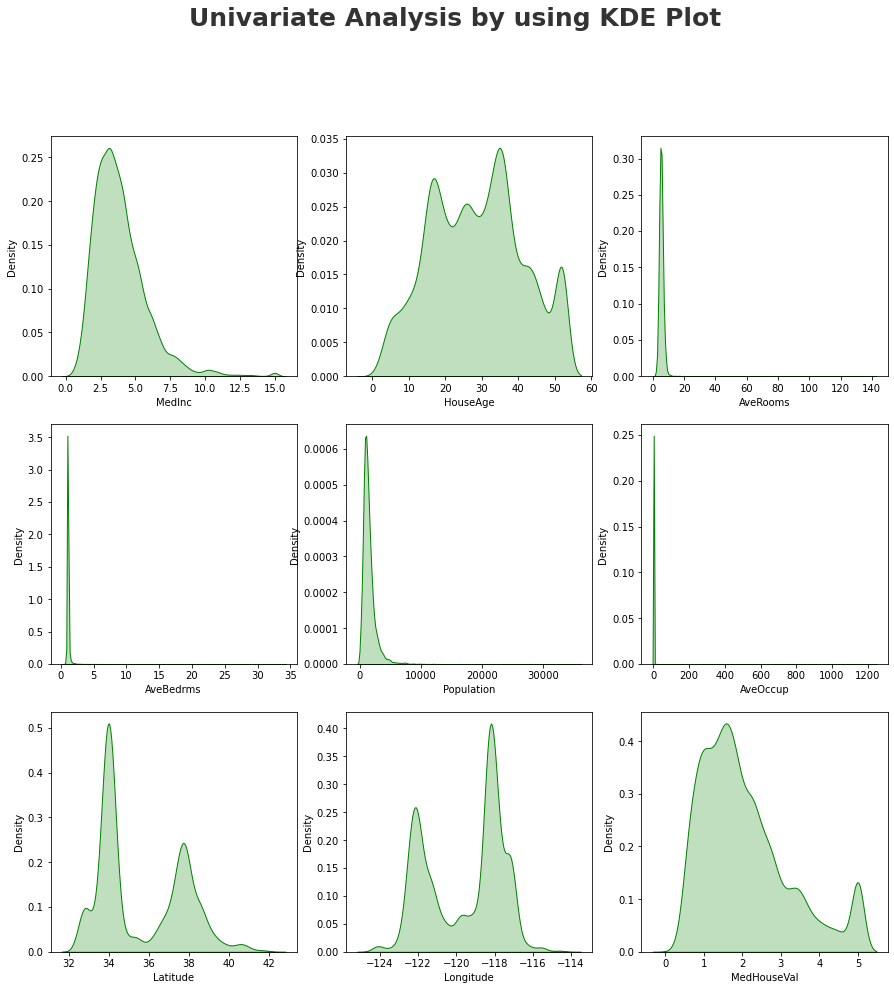

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis by using KDE Plot', fontsize=25, fontweight='bold', alpha=0.8, y=1.)
j=0
for i in num_col_name:
    plt.subplot(3, 3, j+1)
    sns.kdeplot(x=cali_houses_df[i], shade=True, color='g')
    plt.xlabel(i)
    j+=1
    

### Summary

* (MedInc, AveRooms, AveBedrms, MedHouseVal) are right Skewed

* Population satisfied a power law distribution

* There is a Outliers in (MedInc, AveRooms, AveBedrms, AveOccup, MedHouseVal, Poplulation) these features we can also verify this with a box plot or distplot


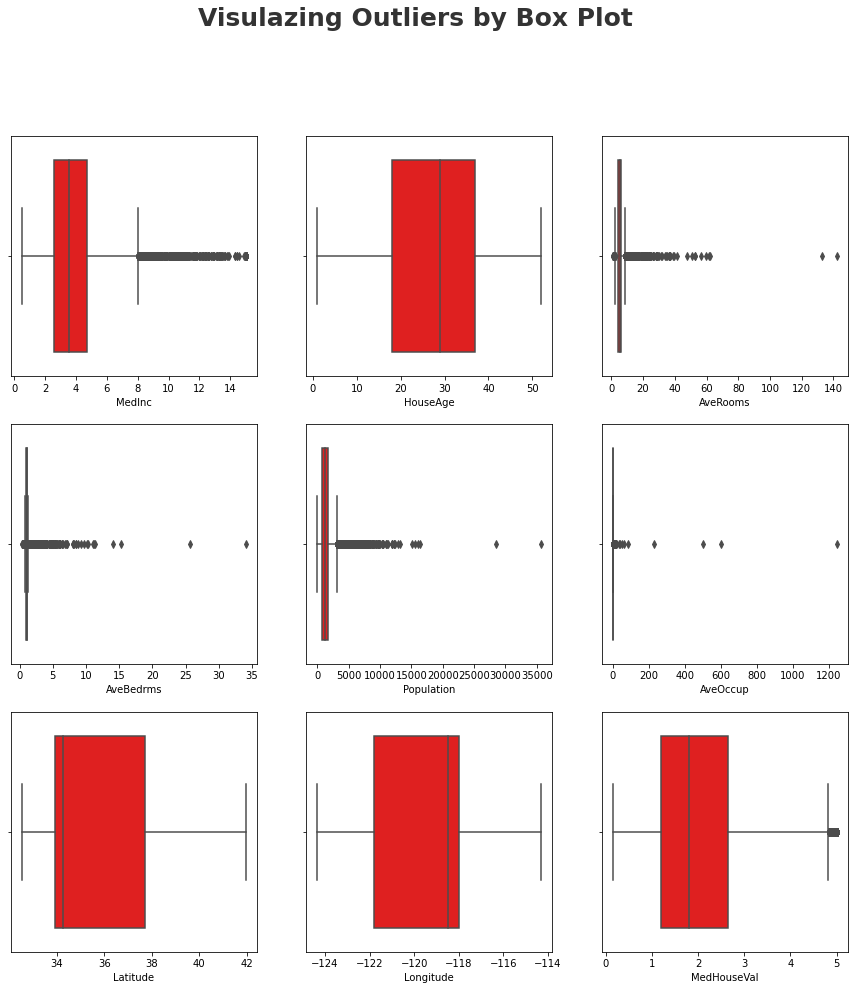

In [12]:
# Plotting a Box plot for Visulazing a Outliers
plt.figure(figsize=(15, 15))
plt.suptitle('Visulazing Outliers by Box Plot', fontsize=25, fontweight='bold', alpha=0.8, y=1.)
j=0
for i in num_col_name:
    plt.subplot(3, 3, j+1)
    sns.boxplot(x=cali_houses_df[i], color='r')
    plt.xlabel(i)
    j+=1

### Summary

* In MedHouseVal(Medium House value) have a very few Outliers

* MedInc, AveRooms AveBedrms, Population, AveOccup in all these features have large portion of a Outliers.

* We need to handle all these Outliers in Feature engineering part.

## Multivariate Analysis

**Multivariate analysis (MVA) is a Statistical procedure for analysis of data involving two or more than two type of measurement or observation**

**Determining Coorelation**

In [13]:
cali_houses_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

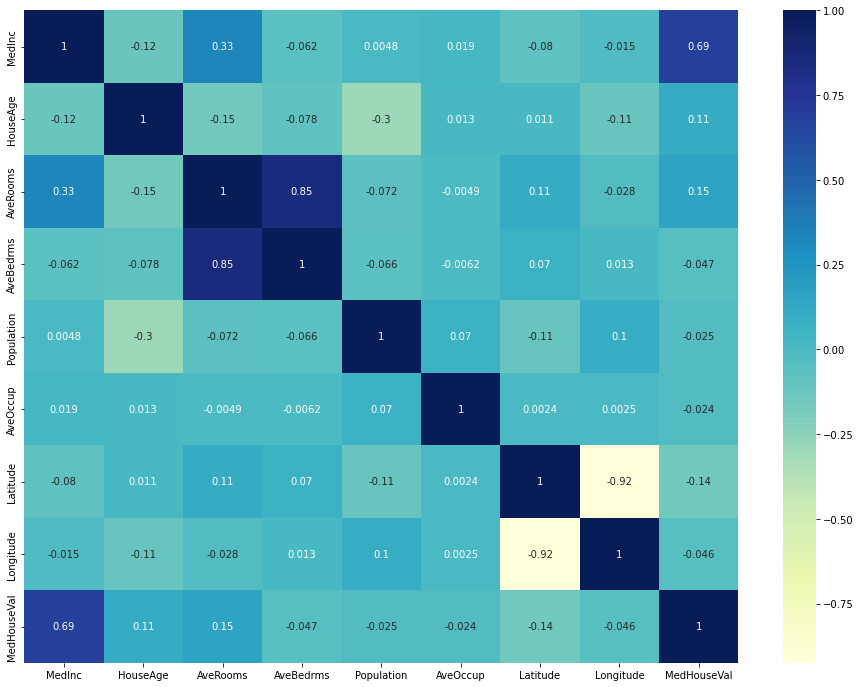

In [14]:
# heatmap
plt.figure(figsize = (16,12))
sns.heatmap(cali_houses_df.corr(), annot=True, cmap="YlGnBu")


### Conclusions:

* MedInc is highly posively coorelated with our Lable or a Target Feature MedHouseVal(Medium House Value)


* The target column MedHouseVal also a weak possitive correlation on HouseAge and AveRooms.


* latitude is also weakly negative coorelated with MedHouseVal.


* There is also a Multicollinearity between a features.

#### Plotting a relationships between a Label and the features. 

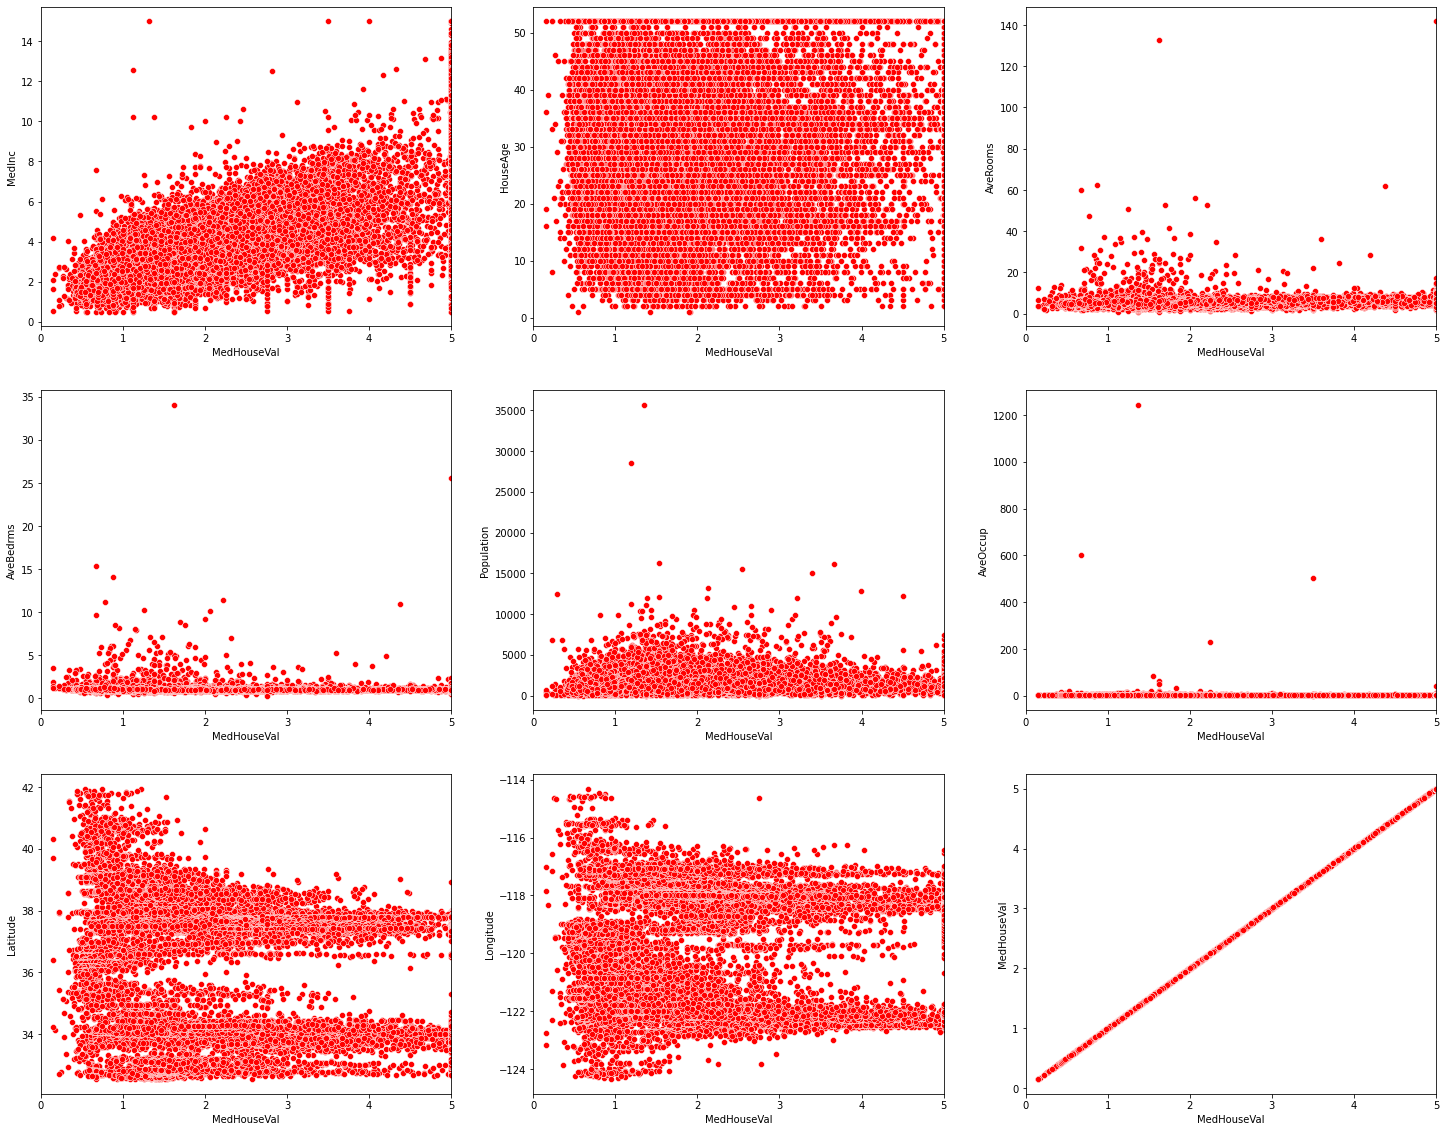

In [15]:
fig = plt.figure(figsize=(25, 20))
j=0
for i in num_col_name:
    plt.subplot(3, 3, j+1)
    sns.scatterplot(data = cali_houses_df, x='MedHouseVal', y = i, color='r')
    plt.xlim(0,5) # Because above 5 there is a outliers 
    j+=1

### Report summary

**Mediam House Price in Distict going to higher if average income of the people of that particular distict group is high**


**As we Know the longitude and latitude that carry geographical information so we can make a scatterplot where x axis and y axis are latitude and longitude and the circle size and color would be linked with the house value of the distict.**

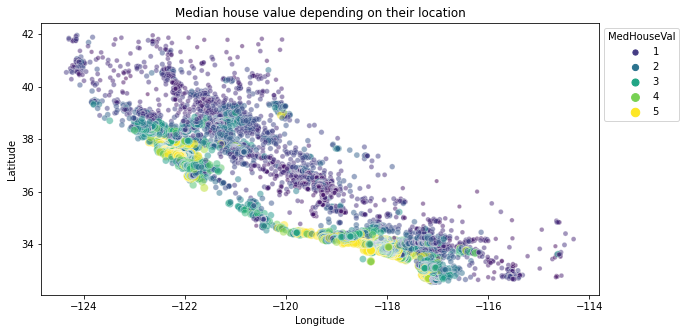

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cali_houses_df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1, 1),
           loc="upper left")
plt.title("Median house value depending on their location")
plt.show()

**Importing an image of California map**

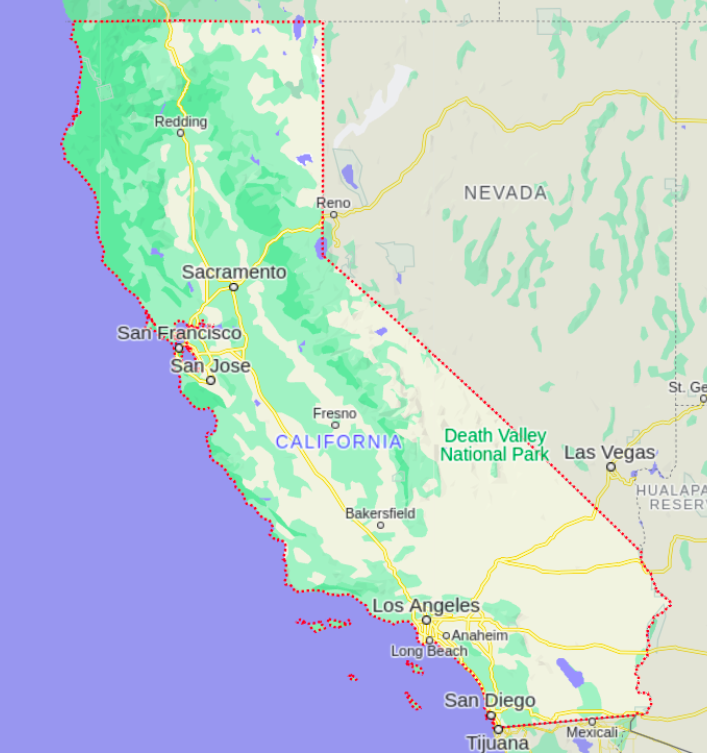

### Report

**Median Price of the Houses are higher for the disticts who are very near  to the Coats**


**For San Diego, Los Angeles, San Jose, or San Francisco have a high house price in comparigion to other Locations**

### Doing a Random Sampling for Validating our Estimates.

In [17]:
sample_size = 500
indexs = np.random.randint(0,cali_houses_df.shape[0],(sample_size))

In [18]:
np.random.randint(0,cali_houses_df.shape[0],(5))

array([ 2347,  8847,  4959,  8277, 19377])

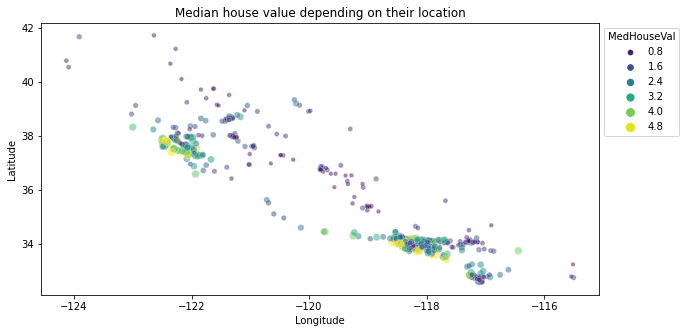

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cali_houses_df.iloc[indexs], x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1, 1),
           loc="upper left")
plt.title("Median house value depending on their location")
plt.show()

**Yes our Estimates are correct about Median House Price dependency on their Locations**

### Top 10 Most frequent Ages of the Houses

In [46]:
cali_houses_df.HouseAge.value_counts().index[:10]

Float64Index([52.0, 36.0, 35.0, 16.0, 17.0, 34.0, 26.0, 33.0, 18.0, 25.0], dtype='float64')

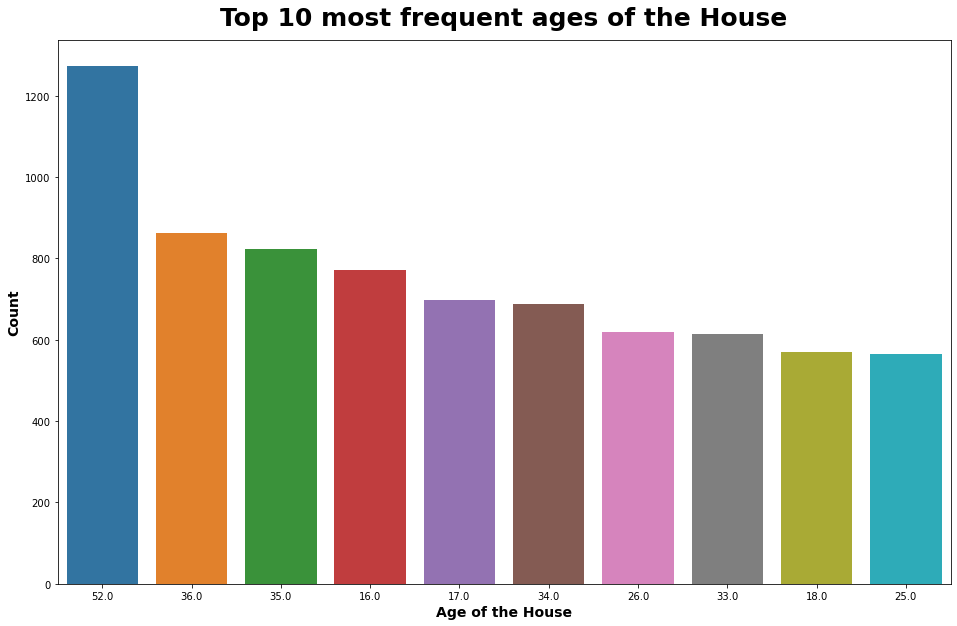

In [58]:
plt.subplots(figsize=(16,10))
sns.countplot(x="HouseAge", data=cali_houses_df, palette="tab10",order = cali_houses_df['HouseAge'].value_counts().index[:10])
plt.title("Top 10 most frequent ages of the House", weight="bold",fontsize=25, pad=15)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Age of the House", weight="bold", fontsize=14)
plt.show()

### Top 10 m=Most Populated Locations

In [151]:
top_populated = sorted(cali_houses_df.Population.unique(), reverse=True)[:10]

In [130]:
popu_df = cali_houses_df.groupby('Population')[['Latitude', 'Longitude', 'Population']].max()
popu_df

,Latitude,Longitude,Population
Population,,,
3.0,34.04,-118.44,3.0
5.0,33.62,-114.62,5.0
6.0,35.21,-117.79,6.0
8.0,37.39,-116.95,8.0
9.0,37.75,-116.76,9.0
...,...,...,...
15507.0,34.03,-117.78,15507.0
16122.0,33.89,-117.74,16122.0
16305.0,38.43,-121.44,16305.0


In [131]:
popu_df.loc[top_populated]

,Latitude,Longitude,Population
Population,,,
35682.0,33.35,-117.42,35682.0
28566.0,36.64,-121.79,28566.0
16305.0,38.43,-121.44,16305.0
16122.0,33.89,-117.74,16122.0
15507.0,34.03,-117.78,15507.0
15037.0,34.04,-117.87,15037.0
13251.0,33.52,-117.12,13251.0
12873.0,34.16,-118.78,12873.0
12427.0,34.70,-120.59,12427.0


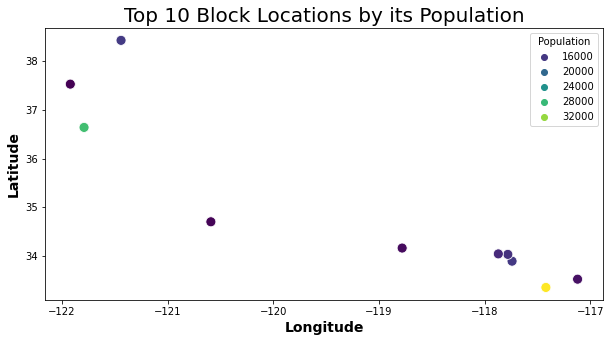

In [207]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=popu_df.loc[top_populated], x="Longitude", y="Latitude", hue="Population",
                  s=100, palette="viridis")
plt.xlabel("Longitude", weight="bold", fontsize=14)
plt.ylabel("Latitude", weight="bold", fontsize=14)
plt.title("Top 10 Block Locations by its Population", fontsize=20)
plt.show()

### Report 

**We can see that the most peoples are lived in Districts who are near to the Cost**

## Blocks Locations by the Top 10 Median Income of the Block.

In [204]:
top_income = sorted(cali_houses_df.MedInc.unique(), reverse=True)[:10]

In [212]:
income_df = cali_houses_df.groupby(['MedInc', 'Latitude', 'Longitude'])[['Latitude', 'Longitude', 'MedInc']].max()
income_df

Latitude  Longitude   MedInc
MedInc  Latitude Longitude                              
0.4999  33.90    -118.04       33.90    -118.04   0.4999
        33.93    -118.28       33.93    -118.28   0.4999
        34.02    -118.28       34.02    -118.28   0.4999
        34.06    -117.75       34.06    -117.75   0.4999
        34.15    -118.08       34.15    -118.08   0.4999
...                              ...        ...      ...
15.0001 37.50    -122.14       37.50    -122.14  15.0001
        37.56    -122.36       37.56    -122.36  15.0001
        37.74    -121.96       37.74    -121.96  15.0001
        37.79    -122.50       37.79    -122.50  15.0001
                 -122.44       37.79    -122.44  15.0001

[20635 rows x 3 columns]

In [205]:
top_income

[15.0001,
 15.0,
 14.9009,
 14.5833,
 14.4219,
 14.4113,
 14.2959,
 14.2867,
 13.947,
 13.8556]

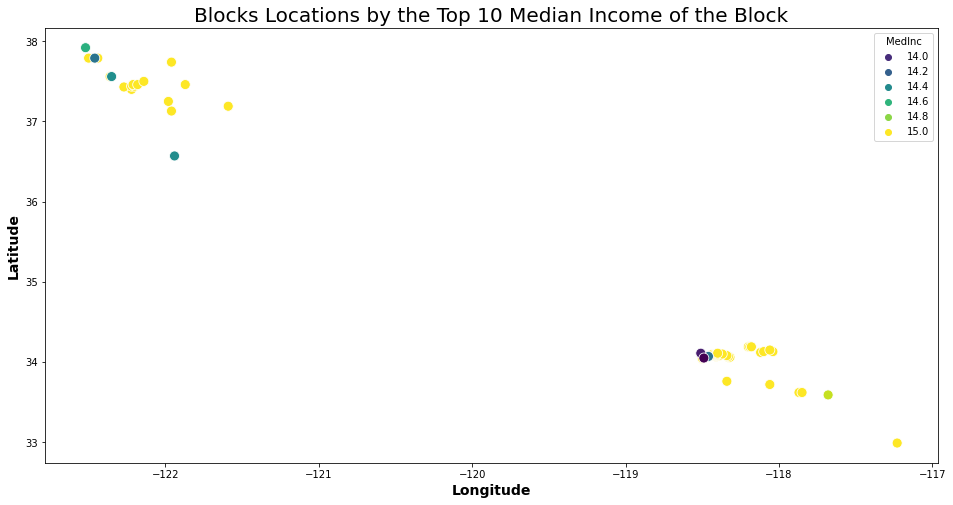

In [217]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=income_df.loc[top_income], x="Longitude", y="Latitude", hue="MedInc",
                  s=100, palette="viridis")
plt.xlabel("Longitude", weight="bold", fontsize=14)
plt.ylabel("Latitude", weight="bold", fontsize=14)
plt.title("Blocks Locations by the Top 10 Median Income of the Block", fontsize=20)
plt.show()

### Report

**Most of the Blocks who have the heigst Median Income they are most probably Comes under (San Fransico, Los angeles,San Jose and San deigo) or they must be very near to them.**

### Cross Check the Estimates of Heigst Median Income with a City by using a (geopy API)

In [227]:
data=income_df.loc[top_income]
lat = data['Latitude']
long = data['Longitude']

In [229]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")
for i,j in zip(lat,long):
    coordinates = "{} , {}".format(i,j)

    location = geolocator.reverse(coordinates)

    address = location.raw['address']

    # Traverse the data
    city = address.get('city', '')
    state = address.get('state', '')
    print(state,city,"----",coordinates,'\n')

California  ---- 32.99 , -117.23 

California  ---- 33.62 , -117.87 

California  ---- 33.62 , -117.85 

California Huntington Beach ---- 33.72 , -118.06 

California  ---- 33.76 , -118.34 

California Santa Monica ---- 34.04 , -118.5 

California Los Angeles ---- 34.05 , -118.5 

California Los Angeles ---- 34.05 , -118.49 

California Los Angeles ---- 34.06 , -118.49 

California Los Angeles ---- 34.06 , -118.33 

California Los Angeles ---- 34.06 , -118.32 

California  ---- 34.07 , -118.41 

California Los Angeles ---- 34.07 , -118.33 

California Los Angeles ---- 34.08 , -118.43 

California  ---- 34.08 , -118.42 

California  ---- 34.08 , -118.4 

California  ---- 34.08 , -118.39 

California Los Angeles ---- 34.08 , -118.34 

California Los Angeles ---- 34.09 , -118.44 

California  ---- 34.09 , -118.42 

California  ---- 34.09 , -118.41 

California  ---- 34.09 , -118.4 

California  ---- 34.1 , -118.4 

California Los Angeles ---- 34.1 , -118.37 

California Los Angeles ---- 3

### Conclusion: -- So our Estimates about a (Most of the Blocks who have the heigst Median Income they are most probably Comes under (San Fransico, Los angeles,San Jose and San deigo) or they must be very near to them.) is Correct.

In [230]:
cali_houses_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

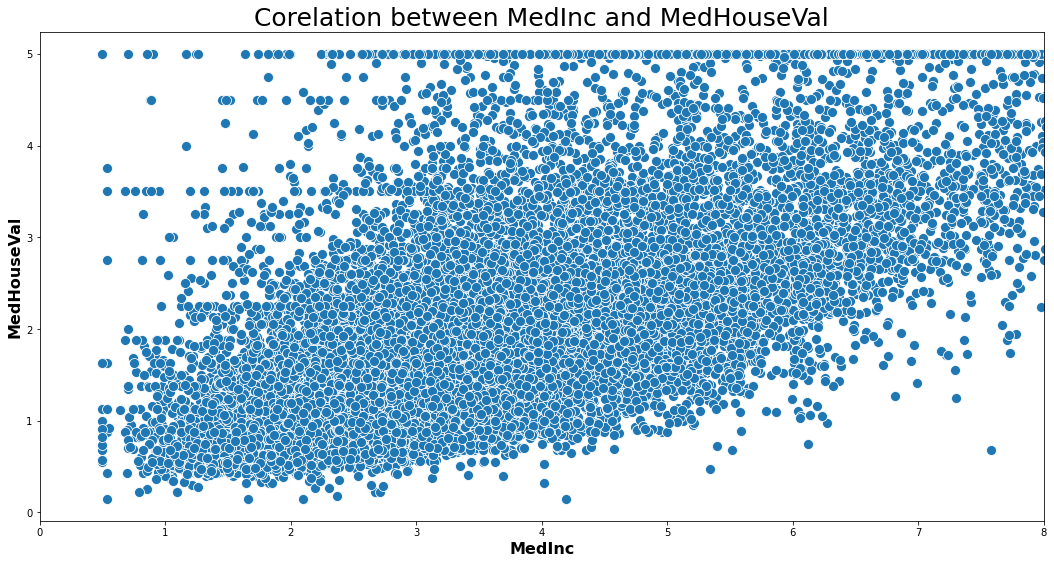

In [235]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=cali_houses_df, x="MedInc", y="MedHouseVal",
                  s=100, palette="viridis")
plt.xlabel("MedInc", weight="bold", fontsize=16)
plt.ylabel("MedHouseVal", weight="bold", fontsize=16)
plt.xlim(0,8.0) # in MedInc after 8 is an Outliers
plt.title("Corelation between MedInc and MedHouseVal", fontsize=25)
plt.show()

## Summary:


### If Median Income of any Particular Block or City is higher that means the Median or Central Price of the House on that Particular Location is also going to be Very high.

### Determining a Null or Missing Values.

In [237]:
cali_houses_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Summary:

### There is no missing value in our Dataset.

# Final Report:--

## 1). There is no null or Missing Value in a Dataset.

## 2). There are Some features who have an Outliers like (MedInc, AveRooms AveBedrms, Population, AveOccup) which we going to handle in Feature Engineering and Data PreProcessing.

## 3). MedInc Feature is Highly Positively Coorelated with a Lavel or Target Feature MedHouseVal.

## 4). Some Features are Right Skewed Log Normal Distributed.

## 5). There is Very weak negative Coorelation between Latitude Feature and Target Feature MedHouseVal.

## 6). In Some Features there is a High Multicolinearity which we need to handle it to make our dataset more reliable for creating a best model.

## 7). The Blocks or the Locations who have the highest Median Income they are (San Fransico, Los angeles, San deigo, San Jose)

## 8). In the California State most of the People lives in that City's who are near to the Cost.

## 9). All Features and Columns have a Numerical datatypes so there is no need of encoding.

## 10). In California The Average age of the Houses in the most of the city's is more than 50 Years.

## 11). Most of the rich People in the California are lived in a these four City's 

* Los angeles

* San Jose

* San Fransico

* San deigo 

## 12). We have to Clean this dataset So we can make a best fit model who can Predict a Average House Price of the houses in the California.

# Mentors -- Krish Naik Sir, Sunny Sir 